In [1]:

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [11]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

df = pd.read_csv(io.StringIO(s.decode('utf-8')))

df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')


In [12]:
df.drop(['dateChecked'],axis=1,inplace=True)


In [13]:
df['state']=df['state'].apply(str)


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19653 entries, 0 to 19652
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         19653 non-null  datetime64[ns]
 1   state                        19653 non-null  object        
 2   positive                     19464 non-null  float64       
 3   probableCases                8498 non-null   float64       
 4   negative                     15641 non-null  float64       
 5   pending                      2039 non-null   float64       
 6   totalTestResultsSource       19653 non-null  object        
 7   totalTestResults             19551 non-null  float64       
 8   hospitalizedCurrently        16278 non-null  float64       
 9   hospitalizedCumulative       12131 non-null  float64       
 10  inIcuCurrently               10694 non-null  float64       
 11  inIcuCumulative              3552 non-nul

In [16]:
df.fillna(value=-1, inplace=True)

df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-02-15,AK,54282.0,-1.0,-1.0,-1.0,totalTestsViral,1584548.0,35.0,1230.0,...,-1.0,0,0,444cf5d36e51d3e6a727746a83aeec9343b453d1,0,0,0,0,0,-1.0
1,2021-02-15,AL,481605.0,103802.0,1853838.0,-1.0,totalTestsPeopleViral,2231641.0,1087.0,44342.0,...,-1.0,2,194,21a07b590ddec909819094569662e403b547886c,0,0,0,0,0,-1.0
2,2021-02-15,AR,313348.0,64997.0,2338955.0,-1.0,totalTestsViral,2587306.0,642.0,14355.0,...,-1.0,10,23,4858c94333d88fa6b4f3c4d1563f6cc8c0c6ad8b,0,0,0,0,0,-1.0
3,2021-02-15,AS,0.0,-1.0,2140.0,-1.0,totalTestsViral,2140.0,-1.0,-1.0,...,-1.0,0,0,7de5461b32f7fc819d70310f4f03e842223dd65c,0,0,0,0,0,-1.0
4,2021-02-15,AZ,798608.0,53559.0,2891627.0,-1.0,totalTestsViral,7243068.0,2119.0,55777.0,...,-1.0,0,110,b021cfc8702f465aa55ed6ae6328e52dcd8033f0,0,0,0,0,0,-1.0


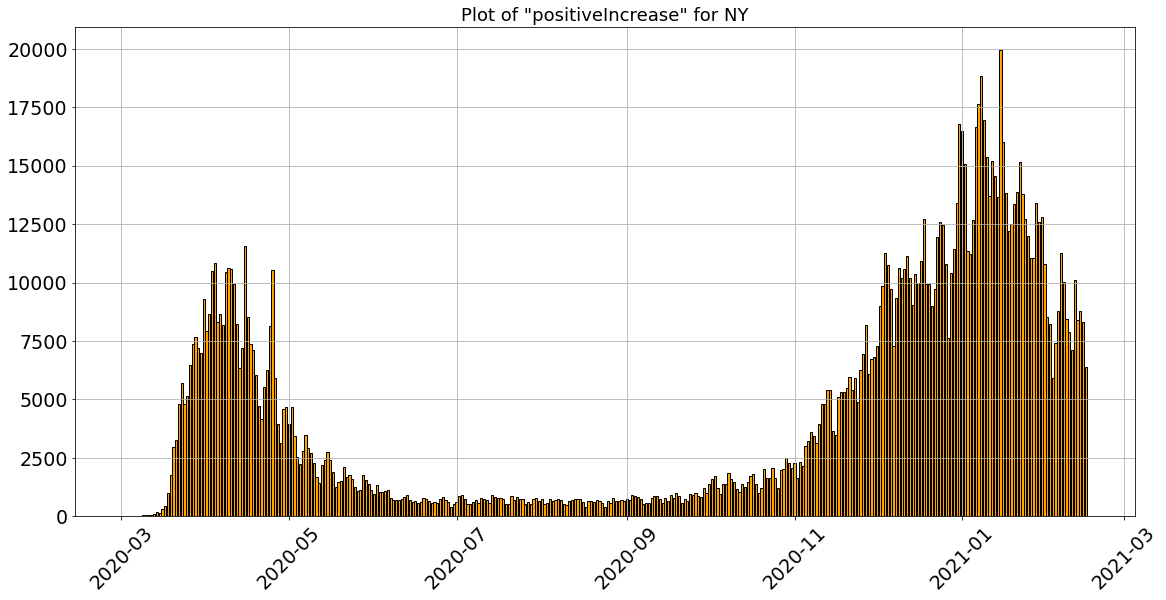

In [33]:
def plot_var(var='positiveIncrease',
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(19,9))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=19,rotation=45)
    plt.yticks(fontsize=19)
    
    plt.show()
plot_var()


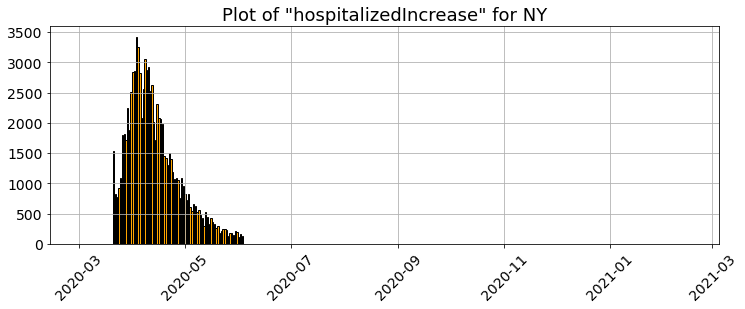

In [20]:
plot_var('hospitalizedIncrease','NY')

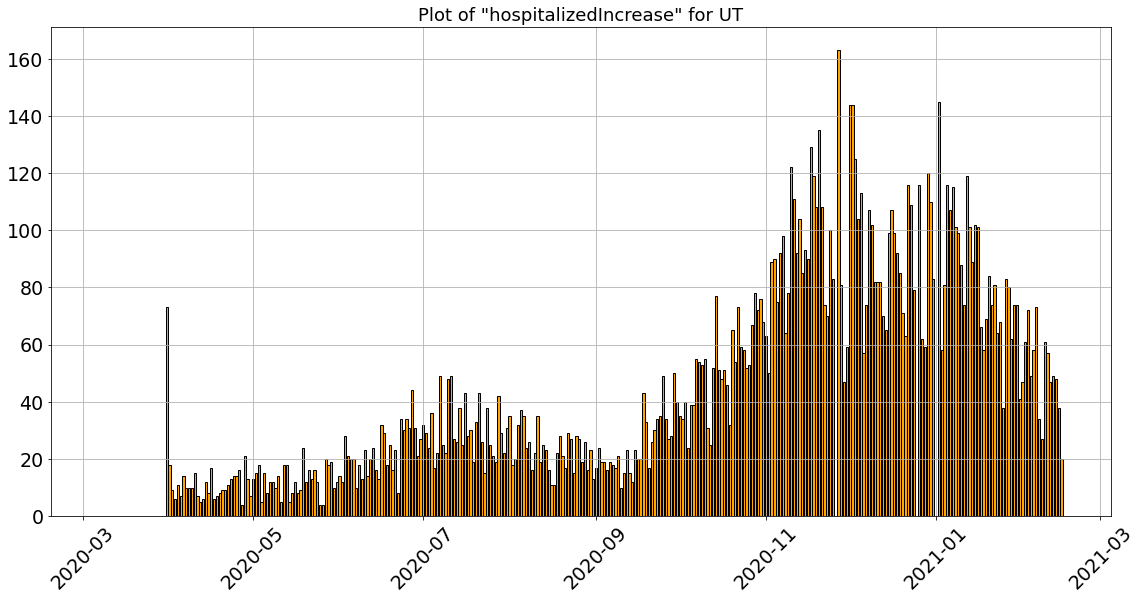

In [69]:
plot_var('hospitalizedIncrease','UT')

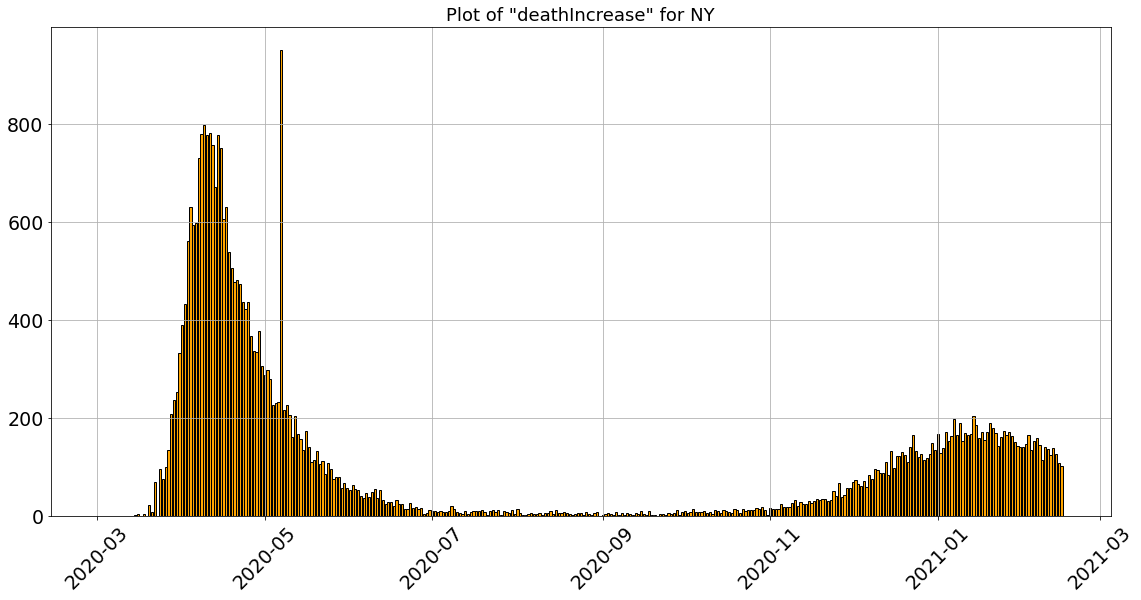

<Figure size 432x288 with 0 Axes>

In [42]:
plot_var('deathIncrease','NY')
plt.savefig('NY_DeathIncrease.png')

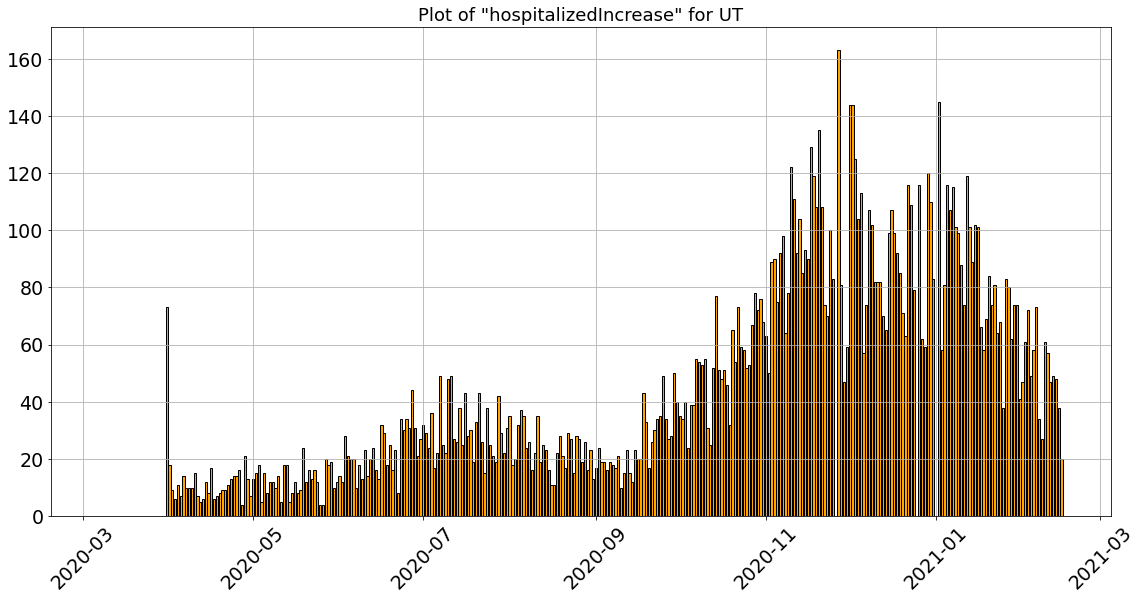

<Figure size 432x288 with 0 Axes>

In [70]:
plot_var('hospitalizedIncrease','UT')
plt.savefig('UT_HospitalizedIncrease.png')

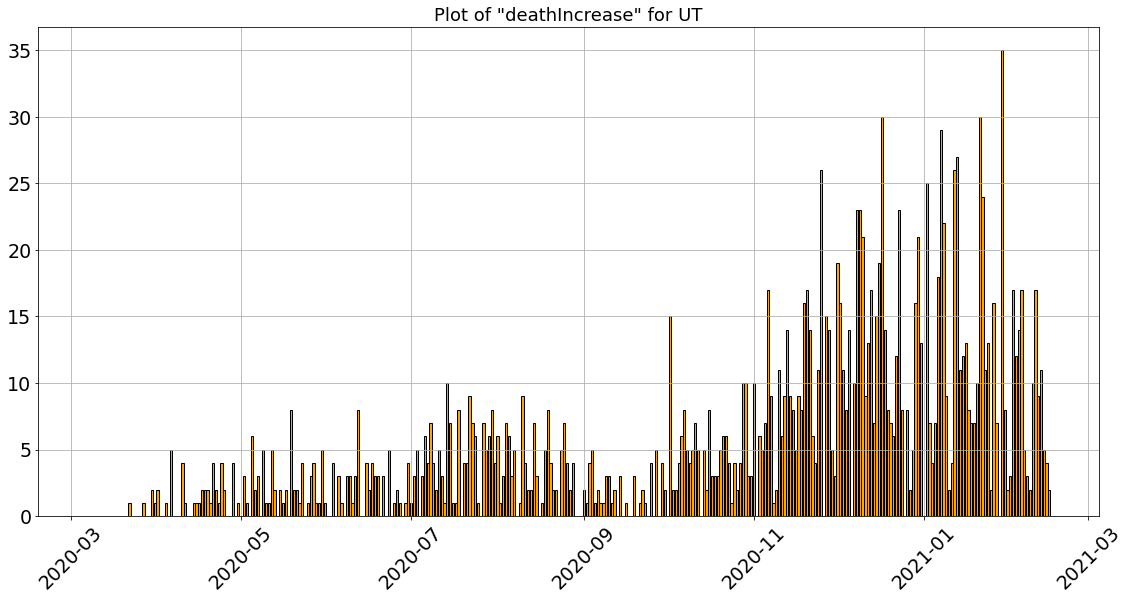

<Figure size 432x288 with 0 Axes>

In [71]:
plot_var('deathIncrease','UT')
plt.savefig('UT_DeathIncrease.png')

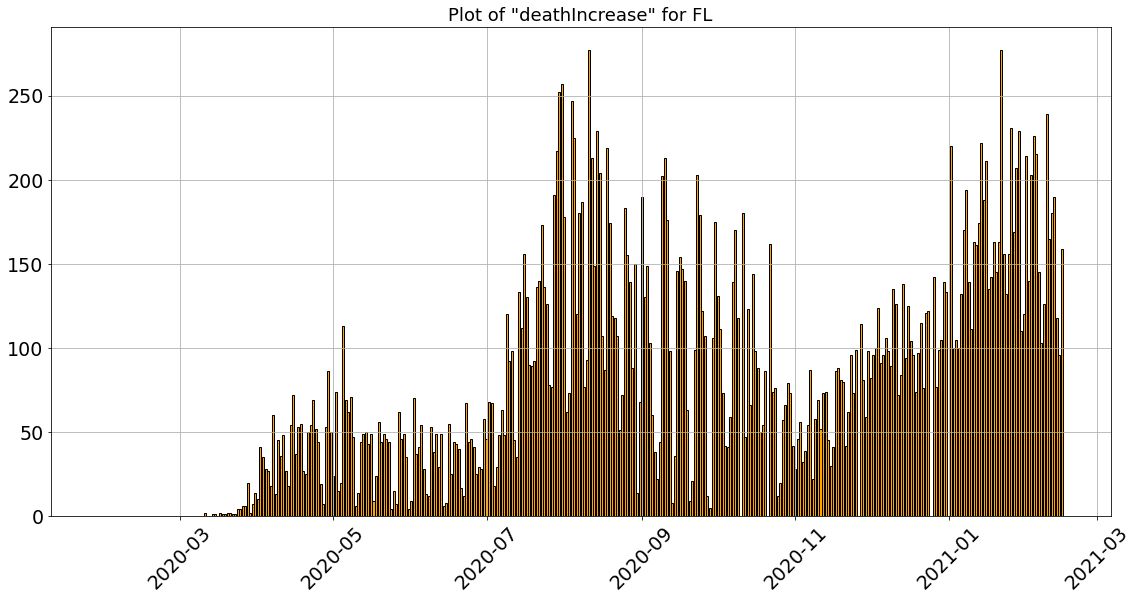

<Figure size 432x288 with 0 Axes>

In [68]:
plot_var('deathIncrease','FL')
plt.savefig('FL_DeathIncrease.png')

In [36]:
def fatality_ratio(state='CA'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

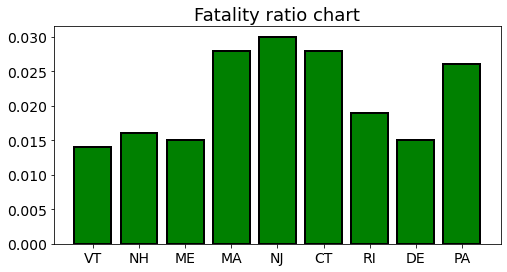

<Figure size 432x288 with 0 Axes>

In [78]:
states = ['VT','NH', 'ME','MA', 'NJ','CT','RI', 'DE', 'PA']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='green',
        edgecolor='k',linewidth=2)

plt.show()

plt.savefig('FatRatioCompEastCoast.png')

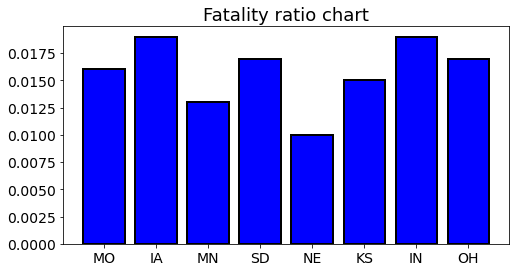

<Figure size 432x288 with 0 Axes>

In [60]:
states = ['MO','IA','MN','SD','NE','KS', 'IN', 'OH']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

plt.savefig('FatRatioMIDWEST.png')


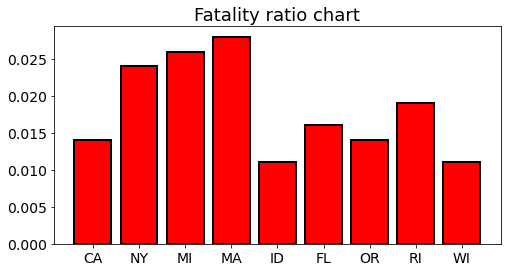

<Figure size 432x288 with 0 Axes>

In [67]:
states = ['CA','NY','MI','MA', 'ID', 'FL','OR','RI', 'WI']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)

plt.show()

plt.savefig('FatRatioComparison.png')


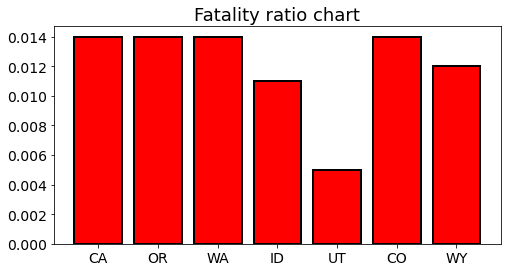

<Figure size 432x288 with 0 Axes>

In [61]:
states = ['CA','OR','WA','ID','UT', 'CO', 'WY']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)

plt.show()

plt.savefig('FatRatioCompWEST.png')



In [62]:
country_df = pd.read_csv('time-series-19-covid-combined.csv')

In [64]:
country_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
105646,2021-02-07,Zimbabwe,NaN,34552,28551.0,1326
105647,2021-02-08,Zimbabwe,NaN,34658,28825.0,1339
105648,2021-02-09,Zimbabwe,NaN,34781,29289.0,1353
105649,2021-02-10,Zimbabwe,NaN,34864,29471.0,1364
